# 1 Import Packages

In [ ]:
import xarray as xr
import numpy as np
import os

import src.config as config
import src.utils as utils

from tqdm import tqdm

import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


2023-02-09 11:25:15.357300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2 Metadata

In [2]:
ml_transform_path = os.path.join(config.data_pro_path,"ml_transform")

In [3]:
lev_index = 0

In [4]:
train_x_filename = "train_data_stack_lonlatstandardized.nc"
valid_x_filename = "valid_data_stack_lonlatstandardized.nc"

train_y_filename = "train_data_amoc_depth_1020_lat_26_samplestandardized.nc"
valid_y_filename = "valid_data_amoc_depth_1020_lat_26_samplestandardized.nc"

# 3 Load Data

In [5]:
train_x_xr = xr.open_dataset(os.path.join(ml_transform_path, train_x_filename)).isel(lev=lev_index)
valid_x_xr = xr.open_dataset(os.path.join(ml_transform_path, valid_x_filename)).isel(lev=lev_index)

In [6]:
train_y_xr = xr.open_dataset(os.path.join(ml_transform_path, train_y_filename))
valid_y_xr = xr.open_dataset(os.path.join(ml_transform_path, valid_y_filename))

In [7]:
train_data_amoc_depth_1020_lat_26_samplestd  = xr.load_dataset(os.path.join(ml_transform_path,"train_data_amoc_depth_1020_lat_26_samplestd.nc" ))
train_data_amoc_depth_1020_lat_26_samplemean = xr.load_dataset(os.path.join(ml_transform_path,"train_data_amoc_depth_1020_lat_26_samplemean,nc"))

# 4 Processing

In [8]:
train_x_xr_stack = train_x_xr.stack(sample=("realization","time"))
valid_x_xr_stack = valid_x_xr.stack(sample=("realization","time"))

In [9]:
train_y_xr_stack = train_y_xr.stack(sample=("realization","time"))
valid_y_xr_stack = valid_y_xr.stack(sample=("realization","time"))


In [10]:
valid_sample_coords = valid_y_xr_stack.sample
train_sample_coords = train_y_xr_stack.sample

train_x_ml_np = np.nan_to_num(np.expand_dims(train_x_xr_stack["rho"].transpose("sample",...).values,3),0)
valid_x_ml_np = np.nan_to_num(np.expand_dims(valid_x_xr_stack["rho"].transpose("sample",...).values,3),0)

train_y_ml_np = train_y_xr_stack["atlantic_moc"].values
valid_y_ml_np = valid_y_xr_stack["atlantic_moc"].values

In [11]:
train_batch_size = int(train_x_ml_.shape[0]/4)
valid_batch_size = valid_x_ml_pt.shape[0]

NameError: name 'train_x_ml_' is not defined

In [ ]:
train_dataset = TensorDataset(train_x_ml_pt, train_y_ml_pt)  
valid_dataset = TensorDataset(valid_x_ml_pt, valid_y_ml_pt)
data_train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
data_valid_loader = DataLoader(valid_dataset, batch_size=valid_batch_size, shuffle=True)

# 5 Model

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(4,4), activation="tanh", padding="same",input_shape=(120,121,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(32,(4,4), activation="tanh", padding="same", input_shape=(60,60,64)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(16,(4,4), activation="tanh", padding="same", input_shape=(30,30,32)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8, activation="tanh"))

model.add(tf.keras.layers.Dense(1, activation="linear"))

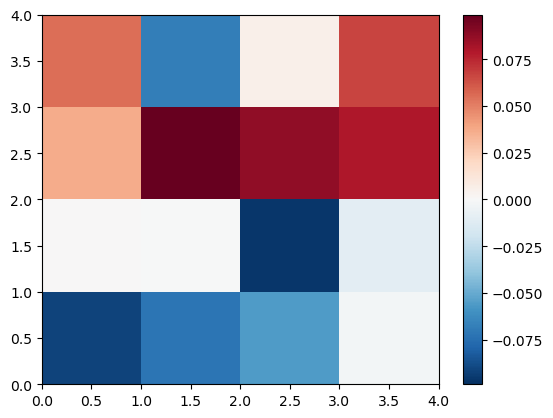

In [108]:
tmp = model.get_weights()[0][:,:,0,63]

vmax = np.abs(tmp).max()

plot = plt.pcolormesh(tmp, vmin = -vmax, vmax=vmax, cmap="RdBu_r")

plt.colorbar(plot)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 120, 121, 64)      1088      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        32800     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 16)        8208      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 16)      

# Train Model

In [17]:
model.compile(optimizer = "adam", loss=tf.keras.losses.mse)

In [39]:
model.fit(x=train_x_ml_np, y=train_y_ml_np, batch_size=2000, epochs=100, validation_data=(valid_x_ml_np, valid_y_ml_np) )

Train on 7800 samples, validate on 1560 samples
Epoch 1/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3802 - val_loss: 0.3726
Epoch 2/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3872 - val_loss: 0.3725
Epoch 3/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3767 - val_loss: 0.3938
Epoch 4/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3715 - val_loss: 0.3698
Epoch 5/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3743 - val_loss: 0.3686
Epoch 6/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3719 - val_loss: 0.3838
Epoch 7/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3901 - val_loss: 0.3702
Epoch 8/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3698 - val_loss: 0.4079
Epoch 9/100
7800/7800 [==============================] - 10s 1ms/sample - loss: 0.3740 - val_loss: 0.377

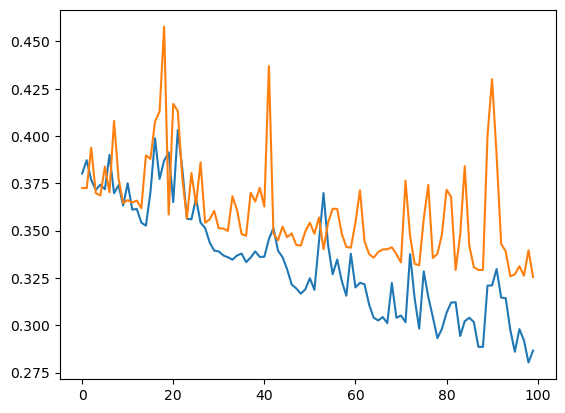

In [40]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])

In [110]:
model.predict(train_x_ml_np)

array([[ 0.87890667],
       [ 1.3494039 ],
       [ 1.0303066 ],
       ...,
       [ 0.27815604],
       [-0.20429206],
       [ 0.16027749]], dtype=float32)

In [113]:
model.get_layer()

ValueError: Provide either a layer name or layer index at `get_layer`.

In [115]:
model.input

<tf.Tensor 'conv2d_5_input:0' shape=(None, 120, 121, 1) dtype=float32>

In [118]:
model.get_layer("conv2d_5")

In [114]:
model.layers

In [121]:
intermediate_layer_model = tf.keras.Model(inputs=model.input,outputs=model.get_layer("conv2d_5").output)

In [123]:
int_media_layer_pred = intermediate_layer_model.predict(train_x_ml_np)

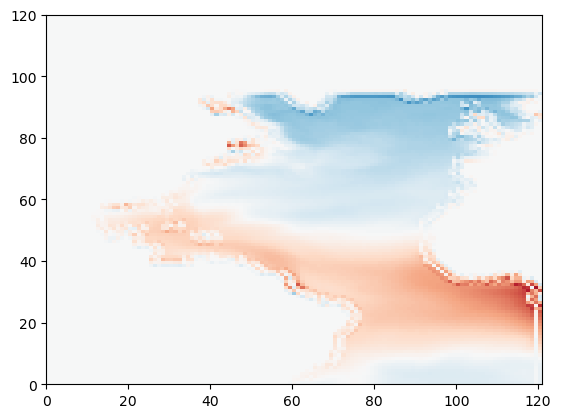

In [137]:

tmp = int_media_layer_pred[0,:,:,0]

vmax = np.abs(tmp).max()

plt.pcolormesh(int_media_layer_pred[0,:,:,23], vmin=-vmax, vmax=vmax, cmap="RdBu_r")

(0.0, 100.0)

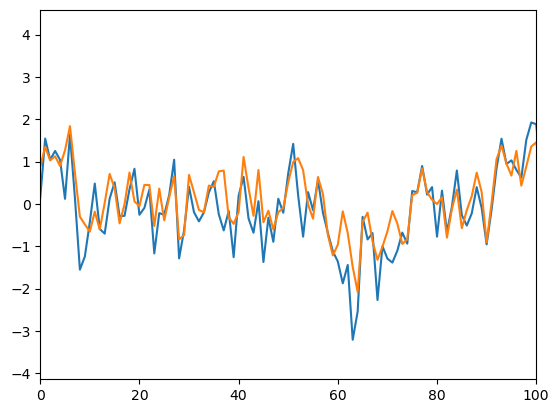

In [62]:

plt.plot(y_train_true)
plt.plot(y_train_pred)

plt.xlim(0,100)

In [55]:
y_train_pred = model.predict(train_x_ml_np)
y_train_true = train_y_ml_np

y_valid_pred = model.predict(valid_x_ml_np)
y_valid_true = valid_y_ml_np

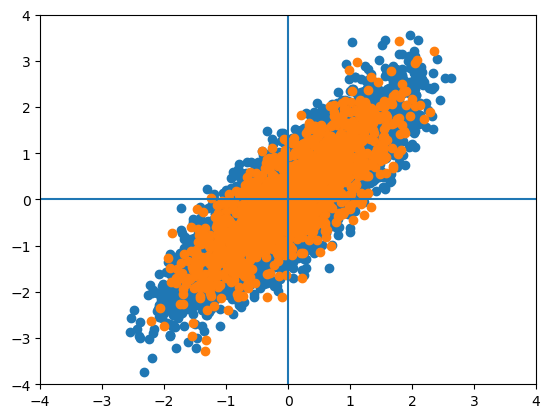

In [57]:
plt.scatter(y_train_pred, y_train_true)
plt.scatter(y_valid_pred, y_valid_true)

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.axhline(0)
plt.axvline(0)

In [42]:
import innvestigate

In [43]:
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)

In [44]:
heatmaps = analyzer.analyze(train_x_ml_np[:,:,:,:])

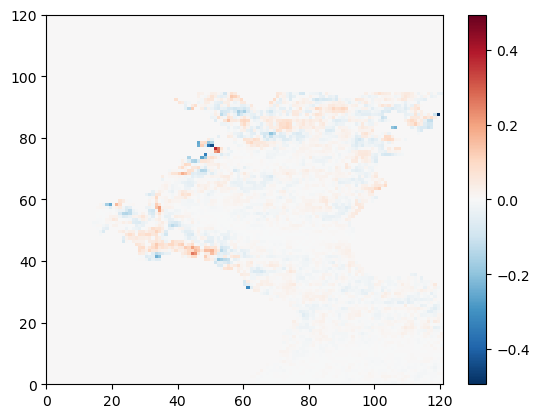

In [63]:
tmp = heatmaps[700,:,:,0]

vmax = np.abs(tmp).max()

plot = plt.pcolormesh(tmp,vmin=-vmax, vmax=vmax,  cmap="RdBu_r")
plt.colorbar(plot)

NameError: name 'activation' is not defined

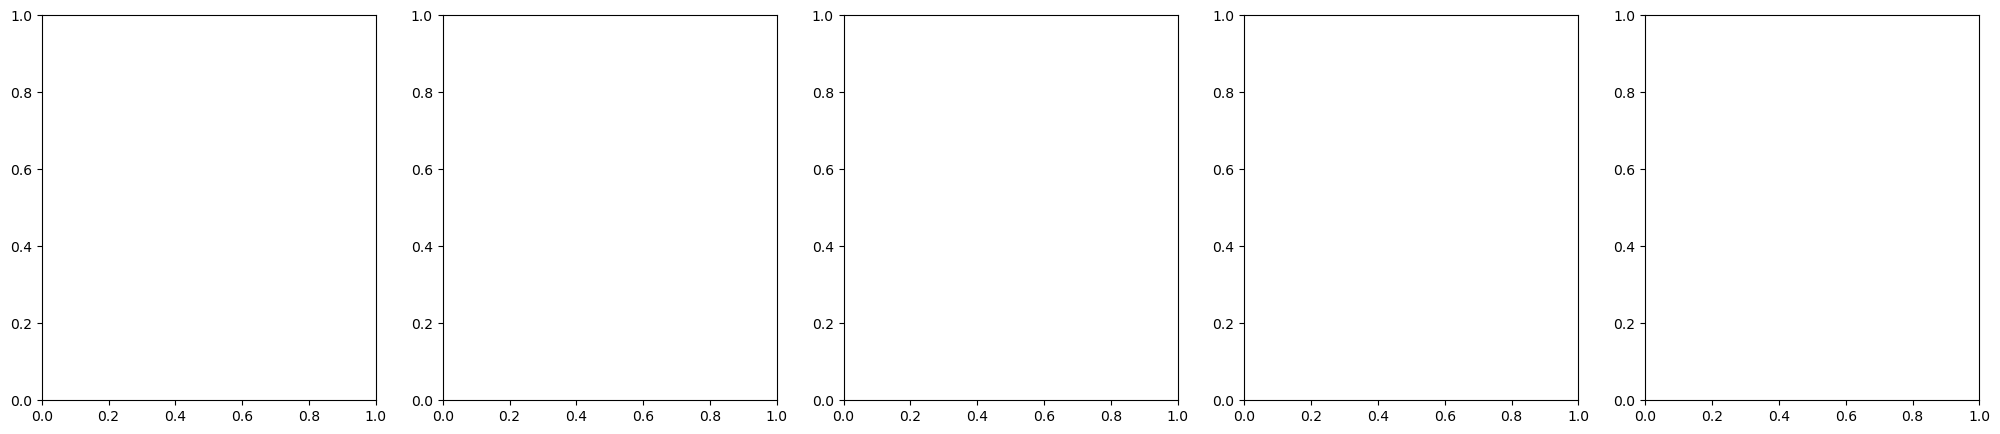

In [36]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

ax_ravel = np.ravel(ax)

for i, ax in enumerate(ax_ravel):
    ax = ax_ravel[i]
    tmp = activation["first_conv"][235,i]
    vmax= np.abs(tmp).max()
    
    plot = ax.pcolormesh(tmp, vmin=-vmax, vmax=vmax, cmap="RdBu_r")
    plt.colorbar(plot, ax = ax)

# 8 LRP

In [154]:
import zennit

In [170]:
composite = zennit.composites.EpsilonPlusFlat()

In [171]:
composite.context(module = net)

In [176]:
torch.eye(1)[[0]]

tensor([[1.]])

In [178]:
with composite.context(net) as modified_model:
    output = modified_model(x_example[0,:])
    output.backward(gradient = torch.eye(1)[[0]])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x49 and 245x5)

In [164]:
with Gradient(model=net, composite=composite) as atributor:
    output, attribution = attributor(x_example, y_example)

NameError: name 'Gradient' is not defined

In [224]:

torch.save(net.state_dict(),"model_state")

In [193]:
a.shape

(5, 1, 10, 10)

In [27]:
tmp = a[4,0]
vmax = np.abs(tmp).max()
plot = plt.pcolormesh(tmp, vmin = -vmax, vmax= vmax, cmap="RdBu_r")
plt.colorbar(plot)

NameError: name 'a' is not defined

(0.0, 2.0)

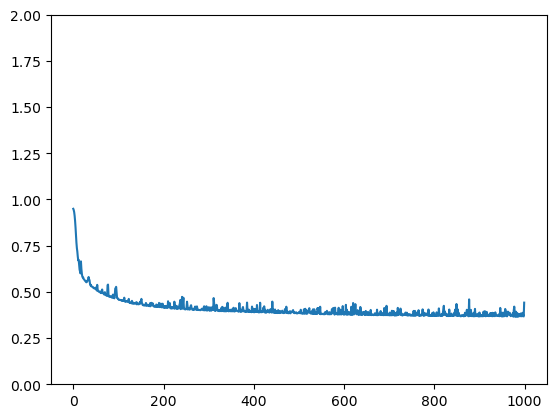

In [199]:
plt.plot(valid_loss_arr)
plt.ylim(0,2)

(0.0, 2.0)

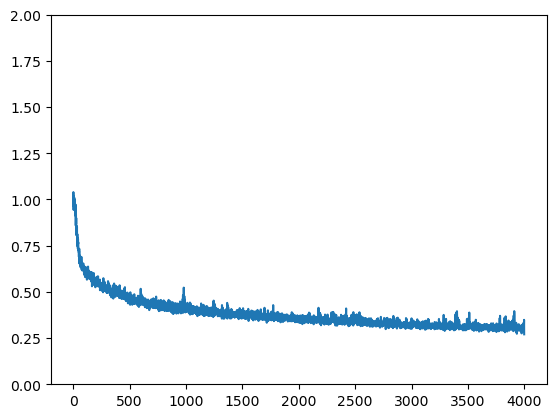

In [200]:
plt.plot(train_loss_arr)
plt.ylim(0,2)

In [201]:
valid_loss_arr[-1]

array(0.4417853, dtype=float32)

In [37]:
y_train_pred = net(train_x_ml_pt).detach().numpy()
y_train_true = train_y_ml_pt.detach().numpy()

y_valid_pred = net(valid_x_ml_pt).detach().numpy()
y_valid_true = valid_y_ml_pt.detach().numpy()

NameError: name 'net' is not defined

In [38]:
plt.scatter(y_train_pred, y_train_true)
plt.scatter(y_valid_pred, y_valid_true)

plt.xlim(-4,4)
plt.ylim(-4,4)

NameError: name 'y_train_pred' is not defined